In [1]:
library(ArchR)
addArchRGenome("hg38")

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

Successfully loaded ArchRProject!

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-853523e323d-Date-2020-05-26_Time-23-48-42.log
If there is an issue, please report to github with logFile!

2020-05-26 23:48:45 : Computing Total Accessibility Across All Features, 0.001 mins elapsed.

2020-05-26 23:48:50 : Computing Top Features, 0.082 mins elapsed.

###########
2020-05-26 23:48:51 : Running LSI (1 of 2) on Top Features, 0.096 mins elapsed.
###########

2020-05-26 23:48:51 : Creating Partial Matrix, 0.096 mins elapsed.

2020-05-26 23:49:33 : Computing LSI, 0.797 mins elapsed.

2020-05-26 23:50:00 : Identifying Clusters, 1.247 mins elapsed.

2020-05-26 23:50:17 : Identified 13 Clusters, 1.528 mins elapsed.

2020-05-26 23:50:17 : Saving LSI Iteration, 1.529 mins elapsed.

2020-05-26 23:50:42 : Creating Cluster Matrix on the total Group Features, 1.959 mins elapsed.

2020-05-26 23:52:34 : Computing Variable Features, 3.822 mins elapsed.

###########
2020-05-26 23:52:3

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6429
Number of edges: 280106

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8273
Number of communities: 16
Elapsed time: 0 seconds


1 singletons identified. 15 final clusters.

2020-05-26 23:53:52 : Testing Biased Clusters, 0.2 mins elapsed.

2020-05-26 23:53:52 : Testing Outlier Clusters, 0.201 mins elapsed.

2020-05-26 23:53:52 : Assigning Cluster Names to 15 Clusters, 0.201 mins elapsed.

2020-05-26 23:53:52 : Finished addClusters, 0.202 mins elapsed.



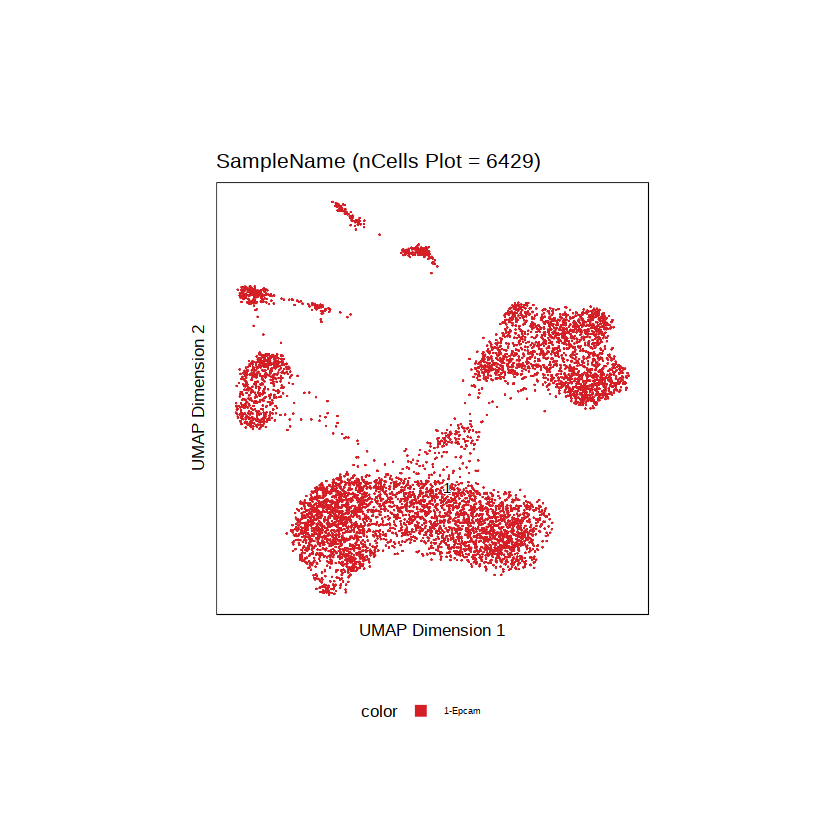

In [8]:
projEpcam1<-loadArchRProject(path='/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam1',force=TRUE, showLogo=FALSE)
projEpcam2<-projEpcam1
projEpcam2 <- addIterativeLSI(
    ArchRProj = projEpcam2,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 2, 
    filterQuantile = 0.96,
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(1), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    dimsToUse = 1:20,
)

projEpcam2 <- addClusters(
    input = projEpcam2,
    reducedDims = "IterativeLSI",
    method = "Seurat",
    name = "Clusters",
    resolution = 1
)

23:44:38 UMAP embedding parameters a = 1.262 b = 1.003

23:44:38 Read 6429 rows and found 20 numeric columns

23:44:38 Using Annoy for neighbor search, n_neighbors = 20

23:44:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

23:44:39 Writing NN index file to temp file /tmp/RtmpINa9Jd/file85366131f14

23:44:39 Searching Annoy index using 16 threads, search_k = 2000

23:44:40 Annoy recall = 100%

23:44:41 Commencing smooth kNN distance calibration using 16 threads

23:44:42 Initializing from normalized Laplacian + noise

23:44:42 Commencing optimization for 500 epochs, with 187392 positive edges

23:45:02 Optimization finished

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-8536cbf39cd-Date-2020-05-26_Time-23-45-03.log
If there is an issue, please report to github w

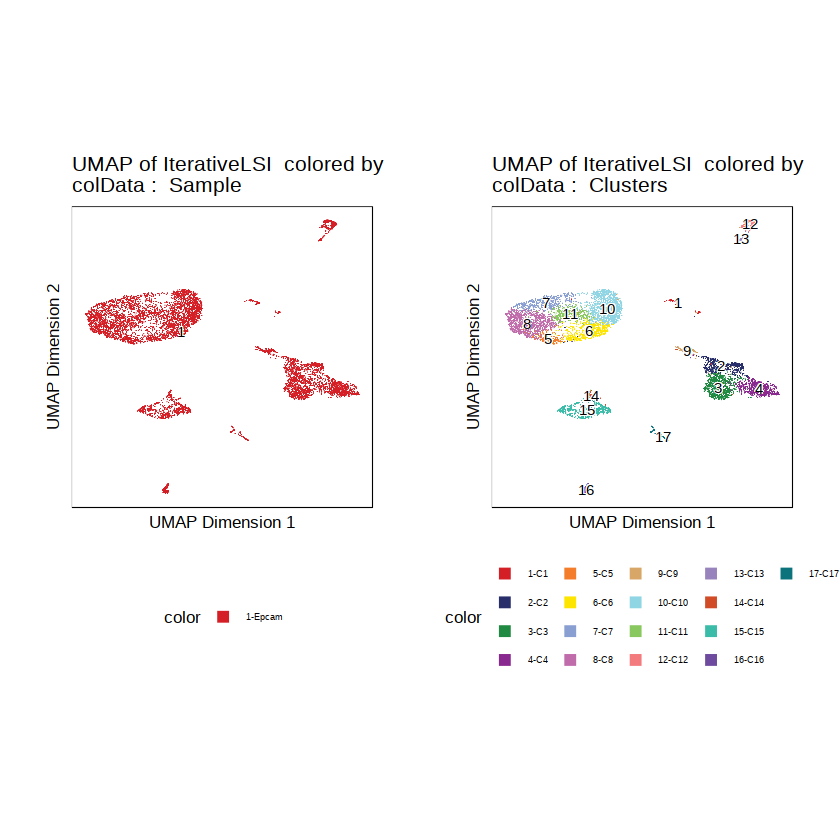

In [7]:
projEpcam2 <- addUMAP(
    ArchRProj = projEpcam2, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 20, 
    minDist = 0.2, 
    metric = "cosine",
    dimsToUse=1:20,
    force=TRUE
)
p1 <- plotEmbedding(ArchRProj = projEpcam2, colorBy = "cellColData", name = "Sample", embedding = "UMAP")
p2 <- plotEmbedding(ArchRProj = projEpcam2, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")
ggAlignPlots(p1, p2, type = "h")

[1] "C10" "C1"  "C3"  "C7"  "C8"  "C16" "C14" "C13" "C2"  "C11" "C15" "C5" 
[13] "C4"  "C17" "C18" "C12" "C6"  "C9"

[1] "Immature_Acinar"      "Mesenchymal"          "Endothelial"         
 [4] "Immature_Acinar"      "Ductal"               "Alpha"               
 [7] "Delta"                "Beta_1"               "Mesenchymal"         
[10] "Proliferating_Acinar" "Alpha"                "Neuronal"            
[13] "Immune"               "Endocrine_Progenitor" "Epsilon"             
[16] "Neuronal"             "Ductal"               "Immature_Acinar"

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4729366b67d-Date-2020-05-26_Time-19-54-58.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4729366b67d-Date-2020-05-26_Time-19-54-58.log

Warning message in normalizePath(outputDirectory):
“path[1]="/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam3": No such file or directory”
Copying ArchRProject to new outputDirectory : /shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam3

Copying Arrow Files...

Copying Arrow Files (1 of 1)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 4): Embeddings

Copying Other Files (2 of 4): IterativeLSI

Copying Other Files (3 of 4): markerGS.Rdata

Copying Other Files (4 of 4): RNAIntegration

Saving ArchRProject...



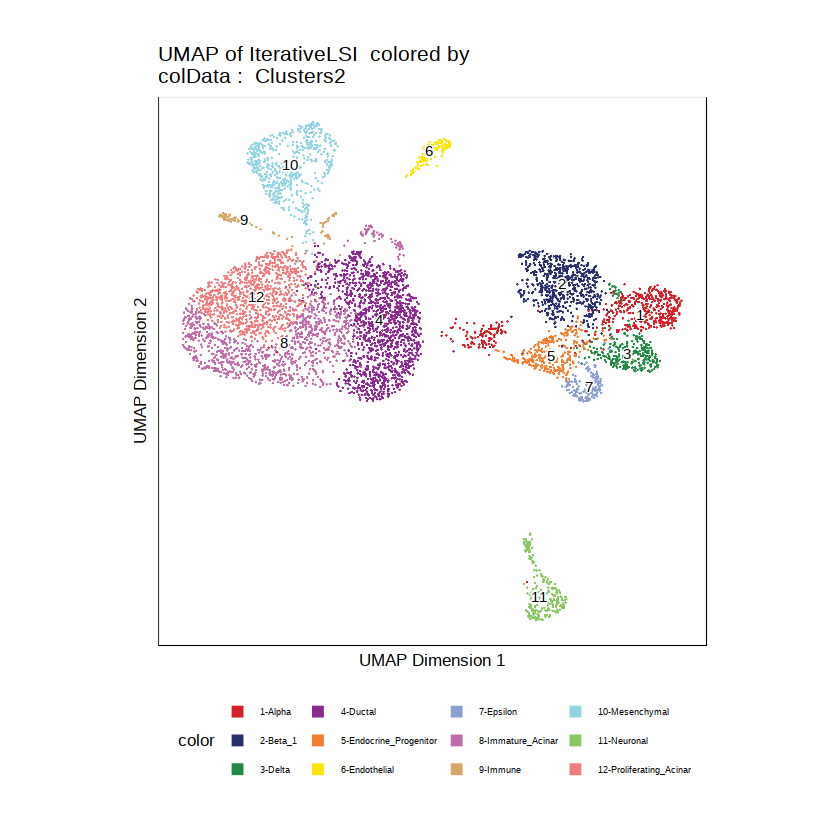

In [4]:
cM <- confusionMatrix(projEpcam3$Clusters, projEpcam3$predictedGroup)
labelOld <- rownames(cM)
labelOld
labelNew <- colnames(cM)[apply(cM, 1, which.max)]
labelNew
projEpcam3$Clusters2<-mapLabels(projEpcam3$Clusters, newLabels= labelNew, oldLabels=labelOld)
p1 <- plotEmbedding(projEpcam3, colorBy = "cellColData", name = "Clusters2")
p1
saveArchRProject(ArchRProj = projEpcam3, outputDirectory = "/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam3", load = FALSE)


In [1]:
library(ArchR)
projEpcam3<-loadArchRProject(path='/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam3',force=TRUE, showLogo=FALSE)
projEndo1<-projEpcam3[which(projEpcam3$Clusters2=='Beta_1' | 
                 projEpcam3$Clusters2=='Delta' | 
                 projEpcam3$Clusters2=='Endocrine_Progenitor' |
                 projEpcam3$Clusters2=='Epsilon' |
                 projEpcam3$Clusters2=='Alpha')]

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-6e397cbe616f-Date-2020-05-26_Time-21-53-51.log
If there is an issue, please report to github with logFile!

2020-05-26 21:53:52 : Computing Total Accessibility Across All Features, 0.001 mins elapsed.

2020-05-26 21:53:56 : Computing Top Features, 0.066 mins elapsed.

###########
2020-05-26 21:53:56 : Running LSI (1 of 2) on Top Features, 0.077 mins elapsed.
###########

2020-05-26 21:53:56 : Creating Partial Matrix, 0.078 mins elapsed.

2020-05-26 21:54:14 : Computing LSI, 0.367 mins elapsed.

2020-05-26 21:54:21 : Identifying Clusters, 0.49 mins elapsed.

2020-05-26 21:54:24 : Identified 10 Clusters, 0.537 mins elapsed.

2020-05-26 21:54:24 : Saving LSI Iteration, 0.537 mins elapsed.

2020-05-26 21:54:35 : Creating Cluster Matrix on the total Group Features, 0.718 mins elapsed.

2020-05-26 21:55:10 : Computing Variable Features, 1.309 mins elapsed.

###########
2020-05-26 21:55:11 : Running LSI (2 of 2) on Variabl

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1934
Number of edges: 69961

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7216
Number of communities: 15
Elapsed time: 0 seconds


2020-05-26 21:55:27 : Testing Outlier Clusters, 0.041 mins elapsed.

2020-05-26 21:55:27 : Assigning Cluster Names to 15 Clusters, 0.041 mins elapsed.

2020-05-26 21:55:27 : Finished addClusters, 0.042 mins elapsed.



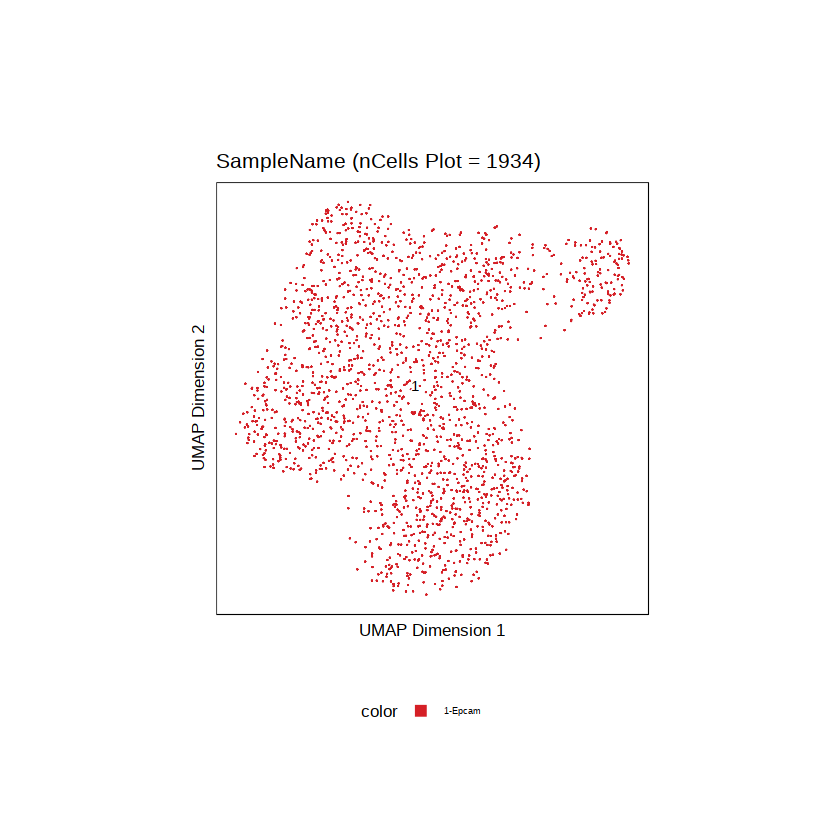

In [22]:
projEndo1<-addIterativeLSI(
    ArchRProj = projEndo1,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI-Endo", 
    iterations = 2, 
    filterQuantile = 0.96,
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(1.8), 
        sampleCells = 2000, 
        n.start = 5), 
    varFeatures = 10000, 
    dimsToUse = 1:14,
    force=TRUE
)
projEndo1 <- addClusters(
    input = projEndo1,
    reducedDims = "IterativeLSI-Endo",
    method = "Seurat",
    name = "Clusters",
    resolution=1.8,
    force=TRUE
)


22:09:54 UMAP embedding parameters a = 0.9922 b = 1.112

22:09:54 Read 1934 rows and found 14 numeric columns

22:09:54 Using Annoy for neighbor search, n_neighbors = 15

22:09:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

22:09:55 Writing NN index file to temp file /tmp/Rtmpx72jQZ/file6e394d9bc4a5

22:09:55 Searching Annoy index using 16 threads, search_k = 1500

22:09:55 Annoy recall = 100%

22:09:56 Commencing smooth kNN distance calibration using 16 threads

22:09:56 Initializing from normalized Laplacian + noise

22:09:56 Commencing optimization for 500 epochs, with 39328 positive edges

22:10:02 Optimization finished

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6e39d425784-Date-2020-05-26_Time-22-10-03.log
If there is an issue, please report to github 

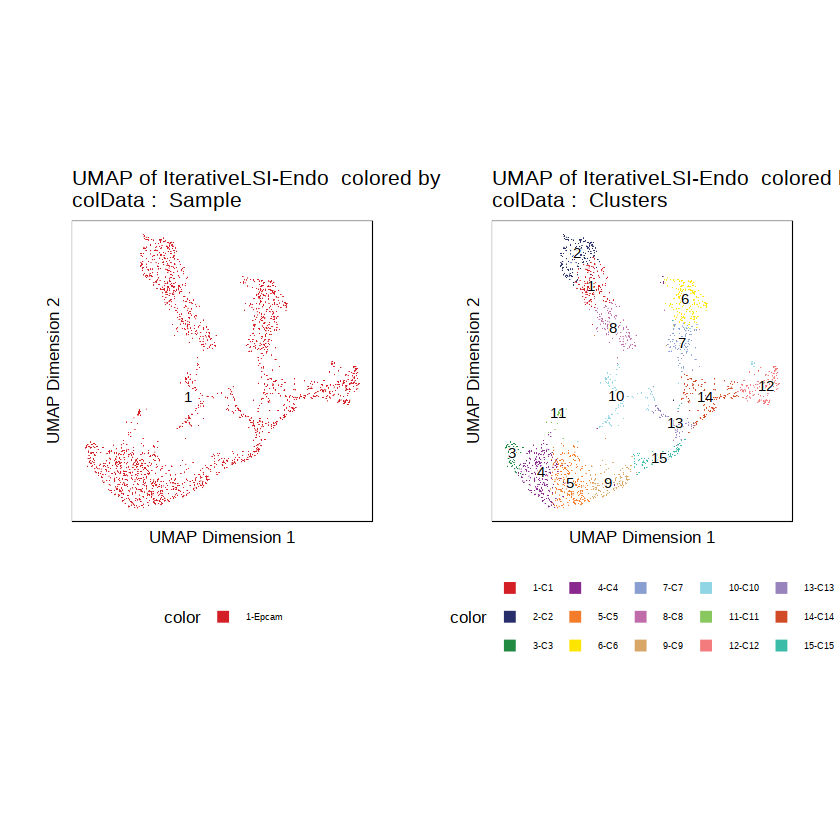

In [32]:
projEndo1 <- addUMAP(
    ArchRProj = projEndo1, 
    reducedDims = "IterativeLSI-Endo", 
    name = "UMAP", 
    nNeighbors = 15,
    dimsToUse = 1:14,
    minDist = 0.3, 
    force=TRUE,
    metric = "cosine"
)

p1 <- plotEmbedding(ArchRProj = projEndo1, colorBy = "cellColData", name = "Sample", embedding = "UMAP")
p2 <- plotEmbedding(ArchRProj = projEndo1, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")

ggAlignPlots(p1, p2, type = "h")

In [24]:
load('SeuratData/Twelve_wpc_Epcam_endocrine_CellFindR.Rdata')

In [25]:
saveArchRProject(ArchRProj = projEndo1, outputDirectory = "/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo1", load = FALSE)

outDir<-'/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo1'
projEndo1 <- addGeneIntegrationMatrix(
    ArchRProj = projEndo1, 
    useMatrix = "GeneScoreMatrix",
    matrixName = "GIM-CellFindR",
    reducedDims = "IterativeLSI",
    seRNA = Twelve_wpc_Epcam_endocrine_CellFindR,
    addToArrow=TRUE,
    force=TRUE,
    groupRNA = "Cell_Type_Subset",
    nameCell = "predictedCell",
    nameGroup = "predictedGroup",
    nameScore = "predictedScore")

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-6e391122692d-Date-2020-05-26_Time-21-56-17.log
If there is an issue, please report to github with logFile!

2020-05-26 21:56:18 : Running Seurat's Integration Stuart* et al 2019, 0.005 mins elapsed.

2020-05-26 21:56:18 : Checking ATAC Input, 0.01 mins elapsed.

2020-05-26 21:56:18 : Checking RNA Input, 0.01 mins elapsed.

2020-05-26 21:56:19 : Creating Integration Blocks, 0.034 mins elapsed.

2020-05-26 21:56:19 : Prepping Interation Data, 0.034 mins elapsed.

2020-05-26 21:56:20 : Computing Integration in 1 Integration Blocks!, 0 mins elapsed.

2020-05-26 21:56:20 : Block (1 of 1) : Computing Integration, 0 mins elapsed.

2020-05-26 21:56:21 : Block (1 of 1) : Identifying Variable Genes, 0.012 mins elapsed.

2020-05-26 21:56:23 : Block (1 of 1) : Getting GeneScoreMatrix, 0.048 mins elapsed.

2020-05-26 21:56:38 : Block (1 of 1) : Imputing GeneScoreMatrix, 0.307 mins elapsed.

Getting ImputeWeights

2020-05-26 21:56:46 : Bloc

[1] "C10" "C6"  "C4"  "C8"  "C7"  "C13" "C12" "C5"  "C1"  "C2"  "C9"  "C14"
[13] "C15" "C3"  "C11"

[1] "Beta_2"               "Delta_1"              "Beta_1"              
 [4] "PreAlpha_1"           "Delta_2"              "Endocrine_Progenitor"
 [7] "Epsilon"              "Beta_1"               "Alpha_1"             
[10] "Alpha_1"              "Beta_1"               "PreEpsilon"          
[13] "FEV_High"             "Beta_1"               "???"

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6e39395e6741-Date-2020-05-26_Time-22-05-03.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6e39395e6741-Date-2020-05-26_Time-22-05-03.log



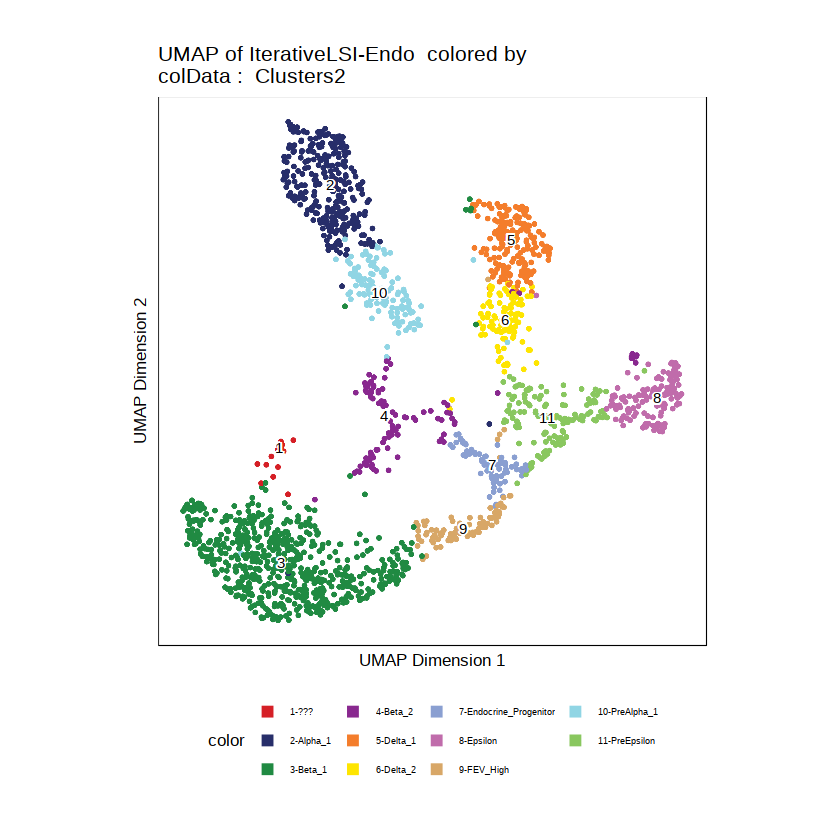

In [31]:
cM <- confusionMatrix(projEndo1$Clusters, projEndo1$predictedGroup)
labelOld <- rownames(cM)
labelOld
labelNew <- colnames(cM)[apply(cM, 1, which.max)]
labelNew
projEndo1$Clusters2<-mapLabels(projEndo1$Clusters, newLabels= labelNew, oldLabels=labelOld)
p1 <- plotEmbedding(projEndo1, colorBy = "cellColData", name = "Clusters2", size=1.5)
p1

In [33]:
saveArchRProject(ArchRProj = projEndo1, outputDirectory = "/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo1", load = FALSE)


Copying ArchRProject to new outputDirectory : /shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo1

Copying Arrow Files...

Copying Arrow Files (1 of 1)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 5): Embeddings

Copying Other Files (2 of 5): IterativeLSI

Copying Other Files (3 of 5): IterativeLSI-Endo

Copying Other Files (4 of 5): markerGS.Rdata

Copying Other Files (5 of 5): RNAIntegration

Saving ArchRProject...



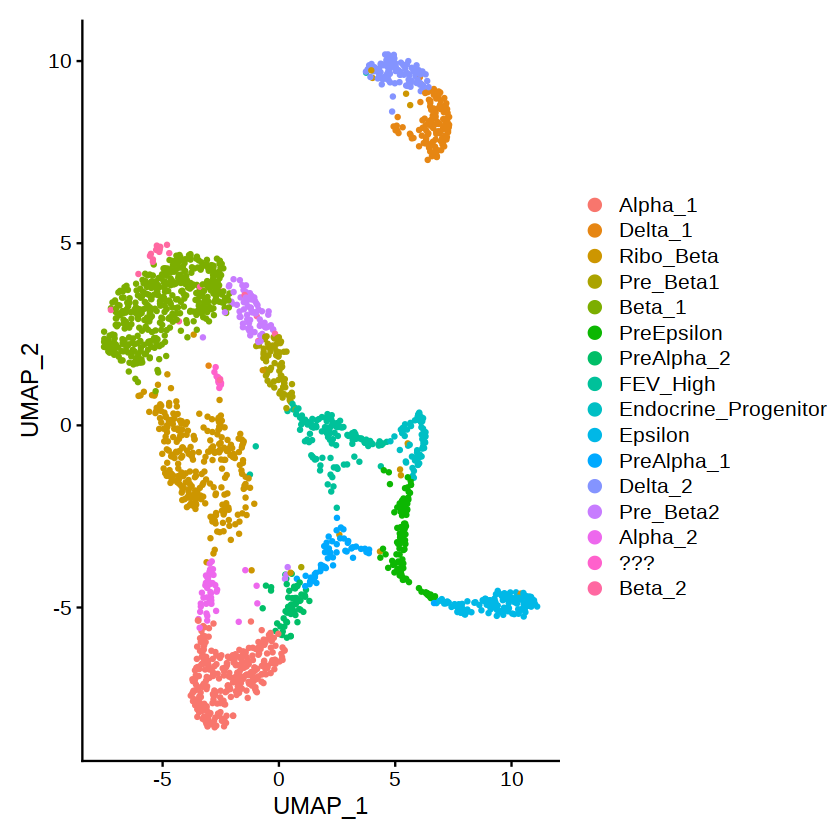

In [34]:
DimPlot(Twelve_wpc_Epcam_endocrine_CellFindR)

In [36]:
load('SeuratData/Twelve_wpc_Epcam.rds')

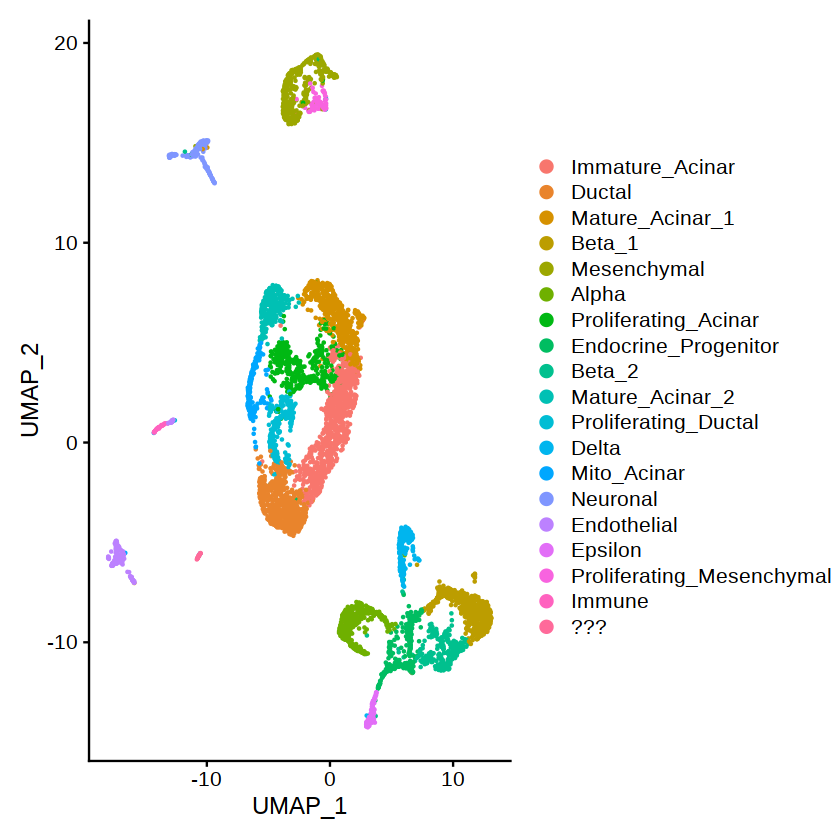

In [37]:
DimPlot(Twelve_wpc_Epcam)